In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data

In [3]:
data = pd.read_csv('weather.csv')

In [4]:
# rename Ktemp and modify the values 
data['Ftemp'] = (data['Ktemp'] - 273.15)*9/5 + 32

In [5]:
data.head()

,time,longitude,latitude,Ktemp,Ftemp
0,1950-01-01 9:00:00,286,40.75,274.39734,34.245212
1,1950-01-02 9:00:00,286,40.75,277.07593,39.066674
2,1950-01-03 9:00:00,286,40.75,280.80090,45.771620
3,1950-01-04 9:00:00,286,40.75,287.14010,57.182180
4,1950-01-05 9:00:00,286,40.75,285.65262,54.504716


#### Part A

In [6]:
data= data.copy()
data['time'] = pd.to_datetime(data['time'])
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

In [7]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


possible improvement of this plot
* color of the line 

In [8]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [9]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

# Assume `data` is your dataframe
# Compute average temperature per month
monthly_avg = data.groupby(['year', 'month'])['Ftemp'].mean().reset_index()

# Function to generate the Plotly figure for a given year
def plot_temperature(year):
    subset = monthly_avg[monthly_avg["year"] == year]
    
    # Ensure there's data for the selected year
    if subset.empty:
        print(f"Warning: No data available for year {year}")
        return None

    # Create the Plotly figure
    fig = px.line(
        subset, 
        x='month', 
        y='Ftemp', 
        title=f'Average Monthly Temperature in {year}', 
        labels={'month': 'Month', 'Ftemp': 'Avg Temperature (°F)'}
    )

    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=list(range(1, 13)),
            ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        )
    )

    return fig

# Generate and save HTML files for all years
for year in sorted(monthly_avg["year"].unique()):
    fig = plot_temperature(year)
    
    if fig:
        filename = f"temperature_plot_{year}.html"
        pio.write_html(fig, filename, full_html=True, include_plotlyjs='cdn')
        print(f"Saved: {filename}")
    else:
        print(f"Skipping year {year} (no data).")


Saved: temperature_plot_1950.html
Saved: temperature_plot_1951.html
Saved: temperature_plot_1952.html
Saved: temperature_plot_1953.html
Saved: temperature_plot_1954.html
Saved: temperature_plot_1955.html
Saved: temperature_plot_1956.html
Saved: temperature_plot_1957.html
Saved: temperature_plot_1958.html
Saved: temperature_plot_1959.html
Saved: temperature_plot_1960.html
Saved: temperature_plot_1961.html
Saved: temperature_plot_1962.html
Saved: temperature_plot_1963.html
Saved: temperature_plot_1964.html
Saved: temperature_plot_1965.html
Saved: temperature_plot_1966.html
Saved: temperature_plot_1967.html
Saved: temperature_plot_1968.html
Saved: temperature_plot_1969.html
Saved: temperature_plot_1970.html
Saved: temperature_plot_1971.html
Saved: temperature_plot_1972.html
Saved: temperature_plot_1973.html
Saved: temperature_plot_1974.html
Saved: temperature_plot_1975.html
Saved: temperature_plot_1976.html
Saved: temperature_plot_1977.html
Saved: temperature_plot_1978.html
Saved: tempera

#### Part B

In [ ]:
subset = data.groupby("year").mean().reset_index()
for i in range(1, len(subset)):
    if subset.loc[i, "Ftemp"] > 55:
        print(f"Year {subset.loc[i, 'year']}  is the first year with an average temperature above 55°F.")
        break
    

Year 1953  is the first year with an average temperature above 55°F.


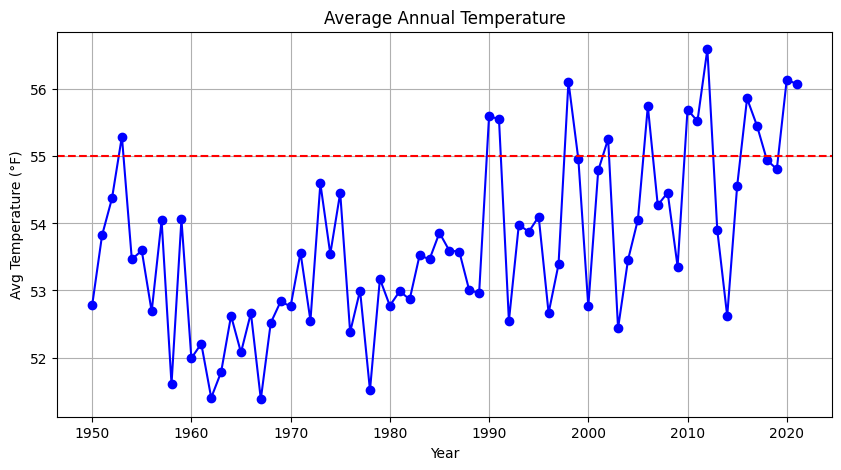

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(subset["year"], subset["Ftemp"], marker='o', linestyle='-', color='blue')
plt.axhline(y=55, color='red', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°F)")
plt.title("Average Annual Temperature")
plt.grid(True)
plt.show()

#### Part C